In [5]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import combinations
from IPython.display import clear_output

In [6]:
pick_data = pd.read_csv("pick_data_upload_2.csv")

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_66484/3130211619.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pick_data = pd.read_csv("pick_data_upload_2.csv")


In [7]:
pick_data

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time,flag_6,flag_7
0,7,AKL,48,20188105006,2,4,St,2018-01-16 03:05:21,0,0
1,10,HRL,48,20188197426,1,24,St,2018-01-30 10:52:31,0,0
2,10,HRL,48,20188197426,1,24,St,2018-01-30 10:58:08,0,0
3,10,HRL,48,20188197426,1,12,St,2018-01-30 12:03:18,0,0
4,10,HRL,48,20188197426,1,24,St,2018-01-30 12:06:39,0,0
...,...,...,...,...,...,...,...,...,...,...
10118249,Z97984,SHL,48,20202687649,1,2,St,2020-03-18 01:24:24,0,0
10118250,Z97984,SHL,48,20202872645,6,1,St,2020-04-22 23:28:20,0,0
10118251,Z97984,SHL,48,20202983837,5,1,St,2020-05-12 22:58:52,0,0
10118252,Z97984,SHL,48,20201001119,4,1,St,2020-05-14 17:48:22,0,0


In [8]:
pick_data = pick_data[(pick_data['flag_6'] == 0) & (pick_data['flag_6'] == 0)]

In [10]:
pick_data["product_id"] = pick_data["product_id"].astype(str)
pick_data["category"] = pick_data["category"].astype(str)
pick_data["source_order_id"] = pick_data["source_order_id"].astype(str)
pick_data["order_number"] = pick_data["order_number"].astype(str)
pick_data["position_in_order"] = pick_data["position_in_order"].astype(int)
pick_data["pick_volume"] = pick_data["pick_volume"].astype(int)
pick_data["quantity_unit"] = pick_data["quantity_unit"].astype(str)
pick_data["date_time"] = pd.to_datetime(pick_data["date_time"])

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_66484/3645244070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pick_data["product_id"] = pick_data["product_id"].astype(str)
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_66484/3645244070.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pick_data["category"] = pick_data["category"].astype(str)
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_66484/3645244070.py:4: SettingWithCopyWarning: 
A value is trying to be set o

In [11]:
product_data=pd.read_csv("002 product_data.csv",header=None,encoding='latin-1')

In [12]:
product_data.columns=["product_id","product_description","product_group"]

In [13]:


merged_df = pd.merge(pick_data, product_data, on='product_id', how='left')

print(merged_df)

merged_df.to_csv('merged_data.csv', index=False)


         product_id category source_order_id order_number  position_in_order  \
0                 7      AKL              48  20188105006                  2   
1                10      HRL              48  20188197426                  1   
2                10      HRL              48  20188197426                  1   
3                10      HRL              48  20188197426                  1   
4                10      HRL              48  20188197426                  1   
...             ...      ...             ...          ...                ...   
10112683     Z97984      SHL              48  20202687649                  1   
10112684     Z97984      SHL              48  20202872645                  6   
10112685     Z97984      SHL              48  20202983837                  5   
10112686     Z97984      SHL              48  20201001119                  4   
10112687     Z97984      SHL              48  20203127974                  7   

          pick_volume quantity_unit    

In [14]:
df=merged_df

df['date_time'] = pd.to_datetime(df['date_time'])

df['year'] = df['date_time'].dt.year

data_by_year = {}

for year in df['year'].unique():
    data_by_year[year] = df[df['year'] == year]

print(data_by_year[2018])

         product_id category source_order_id order_number  position_in_order  \
0                 7      AKL              48  20188105006                  2   
1                10      HRL              48  20188197426                  1   
2                10      HRL              48  20188197426                  1   
3                10      HRL              48  20188197426                  1   
4                10      HRL              48  20188197426                  1   
...             ...      ...             ...          ...                ...   
10112257     Z97980      SHL              48  20188853768                  1   
10112258     Z97980      SHL              48  20188900807                  1   
10112259     Z97980      SHL              48  20188930270                  1   
10112260     Z97980      SHL              48  20189006218                  1   
10112261     Z97980      SHL              48  20189079094                  1   

          pick_volume quantity_unit    

/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_66484/748054046.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_201n['week'] = df_201n['date_time'].dt.isocalendar().week
/var/folders/t0/076wyzj12cgctpjh4_l2656m0000gn/T/ipykernel_66484/748054046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_201n['year'] = df_201n['date_time'].dt.year


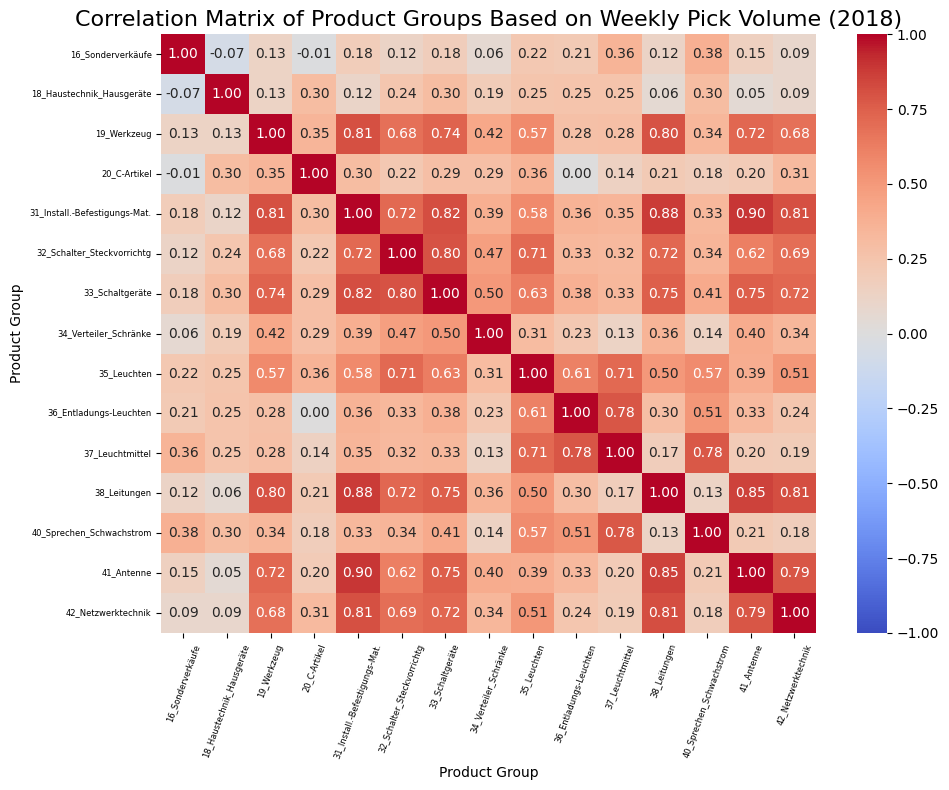

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

year = 2018
df_201n = data_by_year[year]

df_201n['week'] = df_201n['date_time'].dt.isocalendar().week
df_201n['year'] = df_201n['date_time'].dt.year

weekly_data = df_201n.groupby(['year', 'week', 'product_group'])['pick_volume'].sum().reset_index()

weekly_pivot = weekly_data.pivot_table(index='week', columns='product_group', values='pick_volume', aggfunc='sum')

correlation_matrix = weekly_pivot.corr()

plt.figure(figsize=(10, 8)) 
ax = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    center=0, 
    cbar=True, 
    fmt='.2f'
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=70, fontsize=6)  
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=6)  

plt.title(f'Correlation Matrix of Product Groups Based on Weekly Pick Volume ({year})', fontsize=16)
plt.xlabel('Product Group', fontsize=10)
plt.ylabel('Product Group', fontsize=10)

plt.tight_layout()
plt.show()

In [16]:
correlation_matrix

product_group,16_Sonderverkäufe,18_Haustechnik_Hausgeräte,19_Werkzeug,20_C-Artikel,31_Install.-Befestigungs-Mat.,32_Schalter_Steckvorrichtg,33_Schaltgeräte,34_Verteiler_Schränke,35_Leuchten,36_Entladungs-Leuchten,37_Leuchtmittel,38_Leitungen,40_Sprechen_Schwachstrom,41_Antenne,42_Netzwerktechnik
product_group,,,,,,,,,,,,,,,
16_Sonderverkäufe,1.000000,-0.067552,0.132246,-0.014609,0.182910,0.122536,0.177541,0.063971,0.223874,0.208778,0.357871,0.124035,0.378592,0.151409,0.087026
18_Haustechnik_Hausgeräte,-0.067552,1.000000,0.127573,0.304399,0.117184,0.238516,0.301102,0.193053,0.245844,0.252949,0.254843,0.060090,0.302459,0.052701,0.091248
19_Werkzeug,0.132246,0.127573,1.000000,0.349845,0.808171,0.682647,0.737231,0.422548,0.572863,0.276325,0.284770,0.798712,0.340257,0.724095,0.683726
20_C-Artikel,-0.014609,0.304399,0.349845,1.000000,0.297841,0.218976,0.287461,0.285096,0.363850,0.002058,0.142442,0.205810,0.177168,0.202550,0.314752
31_Install.-Befestigungs-Mat.,0.182910,0.117184,0.808171,0.297841,1.000000,0.718231,0.818017,0.389672,0.578085,0.362444,0.347020,0.877877,0.329091,0.898394,0.808826
32_Schalter_Steckvorrichtg,0.122536,0.238516,0.682647,0.218976,0.718231,1.000000,0.801737,0.469058,0.714351,0.332358,0.320997,0.719286,0.344530,0.623470,0.691836
33_Schaltgeräte,0.177541,0.301102,0.737231,0.287461,0.818017,0.801737,1.000000,0.503307,0.628858,0.379876,0.328260,0.753173,0.408467,0.753413,0.721244
34_Verteiler_Schränke,0.063971,0.193053,0.422548,0.285096,0.389672,0.469058,0.503307,1.000000,0.310570,0.225757,0.132035,0.356316,0.135121,0.402884,0.336675
35_Leuchten,0.223874,0.245844,0.572863,0.363850,0.578085,0.714351,0.628858,0.310570,1.000000,0.613248,0.711967,0.501259,0.567716,0.392740,0.512657


In [17]:
weekly_pivot

product_group,16_Sonderverkäufe,18_Haustechnik_Hausgeräte,19_Werkzeug,20_C-Artikel,31_Install.-Befestigungs-Mat.,32_Schalter_Steckvorrichtg,33_Schaltgeräte,34_Verteiler_Schränke,35_Leuchten,36_Entladungs-Leuchten,37_Leuchtmittel,38_Leitungen,40_Sprechen_Schwachstrom,41_Antenne,42_Netzwerktechnik
week,,,,,,,,,,,,,,,
1,34210,1460,265231,66531,1457916,132756,49298,24096,12656,3901,84256,773043,13835,60456,163708
2,37067,2042,416105,44907,2646222,177090,70500,22985,17186,4407,112262,1333223,15833,110278,227759
3,118837,1404,392458,50433,2411189,190698,61553,26988,18237,4373,105884,1310629,12376,104309,232060
4,77622,1708,390193,41588,2393805,187955,61800,25149,16651,4357,102548,1252557,13697,112781,263880
5,131030,1381,384145,52720,2289814,194217,64498,28272,19600,4431,101036,1277499,11355,95130,229769
6,88555,1750,387950,78234,2190640,191514,64773,23276,18658,4020,90024,1266158,13243,95558,223574
7,27761,1728,472196,54728,2168615,197373,61616,38579,17851,3962,90172,1223933,12850,95162,223187
8,63367,1676,362600,31727,2233837,211633,60868,23778,17920,3923,80661,1297186,12930,115925,234309
9,65432,2622,375205,67180,2208067,210441,71447,24887,17552,4003,82099,1173068,13651,93019,266574


In [24]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 11.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 11.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Performing ADF Test on "16_Sonderverkäufe"
ADF Statistic: -6.045625957560067
p-value: 1.3140108513217604e-07
#Lags Used: 0
Number of Observations Used: 28
=> Series is stationary.
Performing ADF Test on "18_Haustechnik_Hausgeräte"
ADF Statistic: -5.792845878610618
p-value: 4.82721990980265e-07
#Lags Used: 0
Number of Observations Used: 28
=> Series is stationary.
Performing ADF Test on "19_Werkzeug"
ADF Statistic: -5.678777523229204
p-value: 8.581955687703246e-07
#Lags Used: 0
Number of Observations Used: 28
=> Series is stationary.
Performing ADF Test on "20_C-Artikel"
ADF Statistic: -4.603706270025474
p-value: 0.00012715303059661378
#Lags Used: 2
Number of Observations Used: 26
=> Series is stationary.
Performing ADF Test on "31_Install.-Befestigungs-Mat."
ADF Statistic: -0.6147758464745263
p-value: 0.8676082154546206
#Lags Used: 8
Number of Observations Used: 20
=> Series is non-stationary.
Applied first differencing to "31_Install.-Befestigungs-Mat.".
Performing ADF Test on "31_Ins

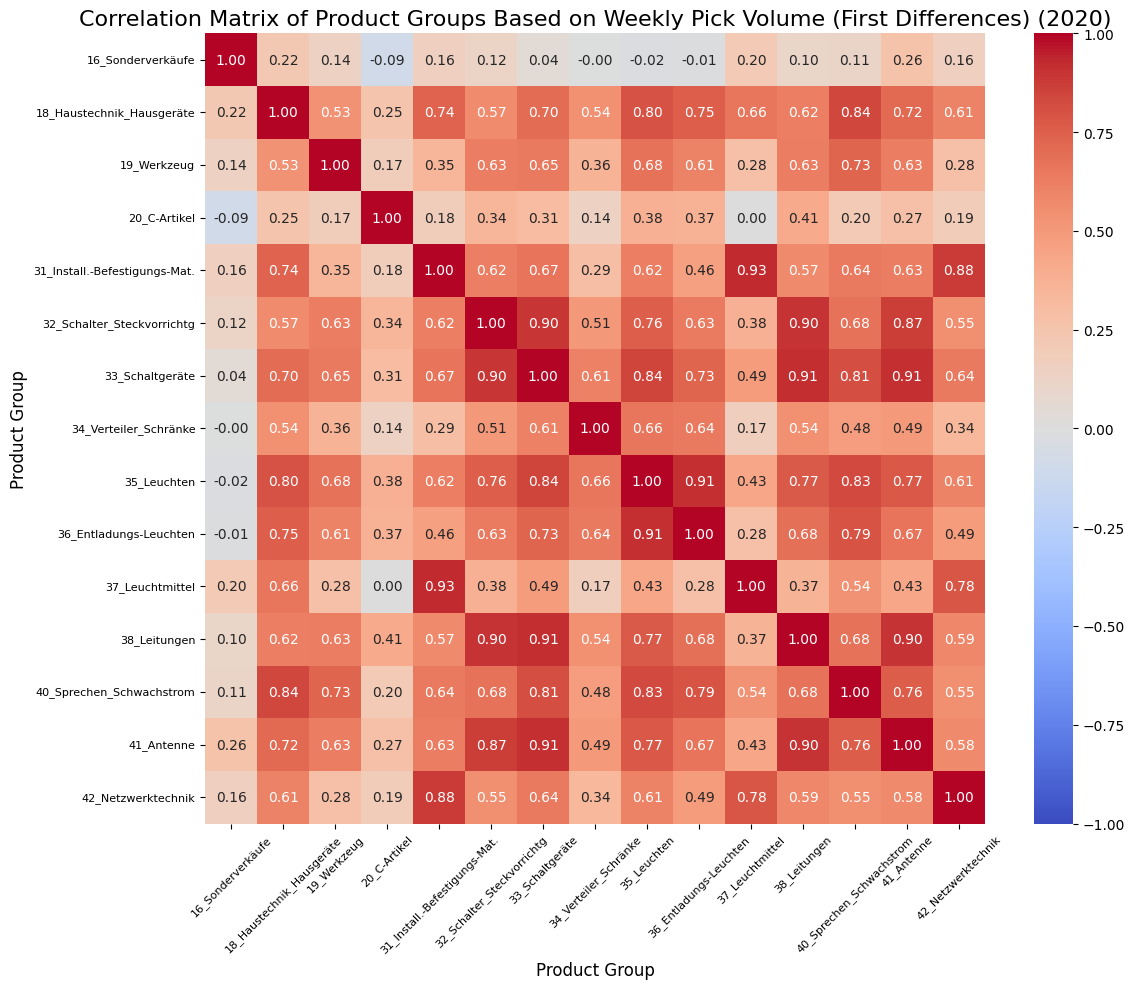


Summary of Differencing Applied:
- 16_Sonderverkäufe: Original
- 18_Haustechnik_Hausgeräte: Original
- 19_Werkzeug: Original
- 20_C-Artikel: Original
- 32_Schalter_Steckvorrichtg: Original
- 33_Schaltgeräte: Original
- 34_Verteiler_Schränke: Original
- 35_Leuchten: Original
- 36_Entladungs-Leuchten: Original
- 37_Leuchtmittel: 1st Difference
- 38_Leitungen: Original
- 40_Sprechen_Schwachstrom: Original
- 41_Antenne: Original


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller



year = 2020
df_201n = data_by_year[year].copy() 

df_201n['week'] = df_201n['date_time'].dt.isocalendar().week
df_201n['year'] = df_201n['date_time'].dt.year

weekly_data = df_201n.groupby(['year', 'week', 'product_group'])['pick_volume'].sum().reset_index()

weekly_pivot = weekly_data.pivot_table(index='week', columns='product_group', values='pick_volume', aggfunc='sum')

weekly_pivot = weekly_pivot.sort_index()


def adf_test(series, title=''):
    """
    Perform ADFuller to test for stationarity of given series.
    Returns True if the series is stationary, False otherwise.
    """
    print(f'Performing ADF Test on "{title}"')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic','p-value','#Lags Used','Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("=> Series is stationary.")
        return True
    else:
        print("=> Series is non-stationary.")
        return False

weekly_pivot_diff = weekly_pivot.copy()

differenced_series = {}

for product in weekly_pivot.columns:
    series = weekly_pivot[product]
    is_stationary = adf_test(series, title=product)
    if not is_stationary:
        weekly_pivot_diff[product] = series.diff()
        print(f'Applied first differencing to "{product}".')
        is_stationary_diff = adf_test(weekly_pivot_diff[product], title=f'{product} (1st Difference)')
        if is_stationary_diff:
            differenced_series[product] = '1st Difference'
        else:
            print(f'Warning: "{product}" is still non-stationary after first differencing.')
    else:
        differenced_series[product] = 'Original'

weekly_pivot_diff = weekly_pivot_diff.dropna()

correlation_matrix_diff = weekly_pivot_diff.corr()

--------------

plt.figure(figsize=(12, 10)) 
ax_diff = sns.heatmap(
    correlation_matrix_diff, 
    annot=True, 
    cmap='coolwarm', 
    vmin=-1, 
    vmax=1, 
    center=0, 
    cbar=True, 
    fmt='.2f'
)

ax_diff.set_xticklabels(ax_diff.get_xticklabels(), rotation=45, fontsize=8)
ax_diff.set_yticklabels(ax_diff.get_yticklabels(), rotation=0, fontsize=8)

plt.title(f'Correlation Matrix of Product Groups Based on Weekly Pick Volume (First Differences) ({year})', fontsize=16)
plt.xlabel('Product Group', fontsize=12)
plt.ylabel('Product Group', fontsize=12)

plt.tight_layout()
plt.show()


print("\nSummary of Differencing Applied:")
for product, status in differenced_series.items():
    print(f'- {product}: {status}')